In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from split import *
from score import *
from scipy import interpolate
import time 
%matplotlib inline 
import warnings 
warnings.simplefilter('ignore', np.RankWarning)
import matplotlib.pyplot as plt
import matplotlib

"""
Title:       Search_By_Triplet + TIME_RESOLUTION.
Status:      This version works well. 

Autor:       Piter Amador Paye Mamani.

Description:
             This python-code is an implementation of the algorithm Search By Triplet that was inspired on the work of
             Daniel Campora.       
             
             
Changes(from here it will work in increasing order):

12. In this version I will modified the Search by triplet i.e. the triplet loop ( part , left , right) 
    and I begin with the version of Misha, it means that (first) I will search two loops. LEFT and rIGHT
    and then I will open a window in the middle plane. It means that I will open a windows on the X and Y direction


1.  Squeletum of the algorithm
2.  First Tracks. 
3. 
4. 
5.  Adding exceptions. 
6.  I've deleted unnecessary comments. Also, I was getting an error at time to compute findcandidatewindows.
    Problems. One get the values of tracks 
7.  Changing the jerarquy of the function, according to the paper. It means that findcandidatewindows is calculated
    on all modules befero they were processed.
6. 
7. 
8.  I've added the information of weak_tracks and I've added the information of USED and NOt USED 
9.  dphi  is a constant value
9.  Adding timing information 


10. In this version I will plot a graphic of efficiency in function of dphi. 
    Here, I am not concentrating on the plots of the tracks. Only on the plots of the efficiency that depend on dphi.
    In other words. I have to run the main program and get the values of the efficiency and then plot. 
    I am thinking on work only with 0.004 percent of the data. Because it is more fast than all data. 
    
11. Adding TIMING TO THE ALGORITHM.     
    To add timing information to the algorithm 
    I've do it previoues analysis like see if the time difference follow a gaussian distribution.
    Plus another important question is to see. How we can add the new restriction to our values. 
    
    I refer that I have to compute the difference in time between t1 and t2 to see if the values surpasses a new technological approach. 
=============================================
To implement : 

def search_by_triplet (..., time=True):
      ...
      if time:  # on all cases where be necessary
          # implement timing information here 

=============================================
"""




"\nTitle:       Search_By_Triplet + TIME_RESOLUTION.\n\nAutor:       Piter Amador Paye Mamani.\n\nDescription:\n             This python-code is an implementation of the algorithm Search By Triplet that was inspired on the work of\n             Daniel Campora.           \nChanges:\n1.  Squeletum of the algorithm\n2.  First Tracks. \n3. \n4. \n5.  Adding exceptions. \n6.  I've deleted unnecessary comments. Also, I was getting an error at time to compute findcandidatewindows.\n    Problems. One get the values of tracks \n7.  Changing the jerarquy of the function, according to the paper. It means that findcandidatewindows is calculated\n    on all modules befero they were processed.\n6. \n7. \n8.  I've added the information of weak_tracks and I've added the information of USED and NOt USED \n9.  dphi  is a constant value\n9.  Adding timing information \n\n\n10. In this version I will plot a graphic of efficiency in function of dphi. \n    Here, I am not concentrating on the plots of the t

# Defining FUNCTIONS

In [141]:
def rho(x,y):
    return np.sqrt(x*x + y*y)
def r(x,y,z):
    return np.sqrt(x*x + y*y + z*z)
def theta(x,y,z):
    return np.arccos(z/r(x,y,z))
def phi(x,y):
    return np.arctan(y/x)
def module(r):
    return np.sqrt(np.sum(r*r))
def r_e(z, r_l, r_c):
    z_c = r_c[2] 
    r_versor = (r_l - r_c)/module(r_l - r_c)               # computing r_versor
    r_versor_dot_z_versor = r_versor[2]  
    return r_c - r_versor/r_versor_dot_z_versor*(z_c - z)  # IMPORTANT WITH THE MINUS SIGN.
def correct_time(hit_time, x, y, z):
    c = 0.299792 #[cm/ps] Light Velocity in [centimeters & pico seconds]
    travel_time = np.sqrt(x*x + y*y + z*z)/c
    return hit_time - travel_time    

# Defining Errors

In [142]:
def dtheta(x, dx, y, dy):
    # definition of theta = arctan(x,y)
    return np.arctan(- x*dy + dx*y) / y**2

In [143]:
def sigma_theta():
    return 

In [144]:
def sigma_time():
    return 

In [145]:
def sigma_z():
    return 

In [146]:
def sigma_x():
    return

In [147]:
def sigma_y():
    return 

In [148]:
def reading_data(fraction, event):
    global time_resolution           # Adding a time resolution to our analysis of tracks
    """
    EVENT
    55microns50psInner55microns50psOuter_EventNumber.txt
    
    25microns0psInner200microns50psOuter_test.txt
    25microns0psInner200microns50psOuter_train.txt
    25microns75psInner25microns75psOuter_test.txt
    25microns75psInner25microns75psOuter_train.txt
    55microns0psInner55microns0psOuter_test.txt
    55microns0psInner55microns0psOuter_train.txt
    55microns100psInner200microns50psOuter_test.txt
    55microns100psInner200microns50psOuter_train.txt
    55microns50psInner55microns50psOuter_test.txt
    55microns50psInner55microns50psOuter_train.txt
    
    RAMPData25microns0psInner200microns50psOuter_test.txt
    RAMPData25microns0psInner200microns50psOuter_train.txt
    RAMPData25microns75psInner25microns75psOuter_test.txt
    RAMPData25microns75psInner25microns75psOuter_train.txt
    RAMPData55microns0psInner55microns0psOuter_test.txt
    RAMPData55microns0psInner55microns0psOuter_train.txt
    RAMPData55microns100psInner200microns50psOuter_test.txt
    RAMPData55microns100psInner200microns50psOuter_train.txt
    RAMPData55microns50psInner200microns50psOuter_test.txt
    RAMPData55microns50psInner200microns50psOuter_train.txt
    RAMPData55microns50psInner55microns50psOuter_test.txt
    RAMPData55microns50psInner55microns50psOuter_train.txt
    RAMPsmeared55microns200psInner55microns50psOuter_test.txt
    RAMPsmeared55microns200psInner55microns50psOuter_train.txt
    test.txt
    testTrain.txt
    """
    name = 'data2/55microns50psInner55microns50psOuter_EventNumber.txt' # To be modified for others files. 
    
    df = pd.DataFrame()
    df = pd.read_csv(name, sep=' ')              # All data.
    
    columns = df.columns.values
    columns[9] = 'Event'
    df.columns = columns

    df_tmp = df.query(f'Event == {event}' ) #.copy(deep = True)  # inplace=True)

    
    df_tmp2, _ = split_frac(df_tmp, fraction)
    
    return df_tmp2        

In [149]:
def sortbyphi():
    global time_resolution               # Adding a time resolution to our analysis of tracks

    global df 
    # IMPORTANT, the dataframe will be modified with the values of the z_CORRECT.
    '''Description:
    Sort each D_i increasingly accoording to phi
    And add a column to the dataframe_module with the name of used to accept or neglect hits. 
    '''
    global sigma_z 

    # Creating new variables to 
    df['phi']   = np.arctan(df['x']/df['y'])                        
    df['t_c']   = correct_time(df['t'], df['x'], df['y'], df['z'])        
    df['used']  = False                                             
    #print("Index ", df.columns)
    
    modules = []
    z_modules = [-277.0, -252.0, -227.0, -202.0, -132.0, -62.0, -37.0, -12.0, 13.0, 38.0, 63.0, 88.0, 113.0, 138.0, 163.0, 188.0, 213.0, 238.0, 263.0, 325.0, 402.0, 497.0, 616.0, 661.0, 706.0, 751.0]
    
    for z_m in z_modules:  
        #print(sigma_z)
        mod = df.query(f" {z_m} - {sigma_z} <= z <= {z_m} + {sigma_z}").copy(deep=True)
        mod['z_mod'] = z_m
        #mod.loc[mod.index.values, "z_mod"] = z_m
        #mod.loc[mod.index.values, "used"]  = False
        # IMPORTANT 
        mod = mod.sort_values('phi', ascending=True)
        #print("Index ", mod['t_c'])
        modules.append(mod)  
    tmp_df =pd.DataFrame()
    for mod in modules:
        tmp_df = pd.concat([tmp_df, mod])
    df = tmp_df
    #print(df['t_c'])
    return modules

In [150]:
#PHI = []
def findcandidatewindows(left_mod, mod, right_mod ):
    #global left_mod, mod, right_mod
    #(left_mod, mod, right_mod ):
    global time_resolution               # Adding a time resolution to our analysis of tracks
    # phi_window     =  phi_extrapolation_base + np.abs( hit_Zs[h_center]) * phi_extrapolation_coef 
    global phi_extrapolation_coef, phi_extrapolation_base , dphi
    '''Description: 
        Compute the first and last candidates(the window) according to acceptance range(dphi) for each hit.
        SUPPOSSING THAT ALL DATA ARE ORDERED ACCOURDING TO PHI. THIS PROCCESS WAS DONE Previously
        In case of add more information to the modules, one easily can add throught the iteration 
    '''
    # CONVENTION :     
    # l_m  m  r_m   the values are ordered.      
    #  |   |   |             
    #  |   |   |    phi up  
    #  |   |   |    phi      
    #  |   |   |    phi down 
    #  |   |   |          
    
    right_hit_max = [] 
    right_hit_min = [] 

    temporal = mod['phi'] 
    
    # ITERATION OVER PHI FOR RIGHT 
    
    for phi_i in mod['phi']: 
        #print("=")
        #print(phi_i)
        if str(phi_i) == 'nan' :     
            #print(phi_i, "the value of phi_i is NaN ON RIGHT")
            m = "nan"               # minumum hit 
            M = "nan"               # maximum hit
            right_hit_min.append(m) 
            right_hit_max.append(M) 
            continue # 
        if str(phi_i) == 'NaN' :     
            #print(phi_i, "the value of phi_i is NaN ON RIGHT")
            m = "nan"               # minumum hit 
            M = "nan"               # maximum hit
            left_hit_min.append(m) 
            left_hit_max.append(M) 
            continue # 
            
        
        z_center = mod['z_mod'].unique()[0]
        #z = df.query(f"phi=={phi_i}")["z"].values[0]
        # GET HIT 
        """ dphi =  phi_extrapolation_base + np.abs( z_center ) * phi_extrapolation_coef """

        #PHI.append(dphi)
        down      = phi_i - dphi 
        up        = phi_i + dphi 
        #print(down, up)
        
        condition = f'{down} <= phi <=  {up}'
        tmp_df = right_mod.query(condition)
        if not tmp_df.empty:
            m = tmp_df['hit_id'][tmp_df.index[0]]     # minumum hit 
            M = tmp_df['hit_id'][tmp_df.index[-1]]    # maximum hit 
            right_hit_min.append(m) 
            right_hit_max.append(M) 
        elif tmp_df.empty :

            m = "nan" #pd.np.nan                      # minumum hit 
            M = "nan" #pd.np.nan                      # maximum hit
            right_hit_min.append(m)  
            right_hit_max.append(M) 
            
    left_hit_max = [] 
    left_hit_min = [] 
    # ITERATION OVER PHI FOR LEFT
    for phi_i in mod['phi']:
        if str(phi_i) == 'NaN' :     
            # print(phi_i, "the value of phi_i is NaN ON LEFT")
            m = "nan"               # minumum hit 
            M = "nan"               # maximum hit
            left_hit_min.append(m) 
            left_hit_max.append(M) 
            continue # 
        if str(phi_i) == 'nan' :     
            # print(phi_i, "the value of phi_i is NaN ON left")
            m = "nan"               # minumum hit 
            M = "nan"               # maximum hit
            left_hit_min.append(m) 
            left_hit_max.append(M) 
            continue # 
        # GET HIT 
        down      = phi_i - dphi 
        up        = phi_i + dphi 
        condition = f'{down} <= phi <= {up}'
        tmp_df = left_mod.query(condition)
        #print("len LEFT", len(tmp_df))
        if not tmp_df.empty :
            m = tmp_df['hit_id'][tmp_df.index[0]]        # minumum hit 
            M = tmp_df['hit_id'][tmp_df.index[-1]]       # maximum hit  
            left_hit_min.append(m)
            left_hit_max.append(M)
        elif tmp_df.empty :
            # print("data_frame is empty LEFT")
            m = "nan"               # minumum hit 
            M = "nan"               # maximum hit
            left_hit_min.append(m) 
            left_hit_max.append(M) 
            
    mod["right_hit_max"] = right_hit_max  
    mod["right_hit_min"] = right_hit_min  
    mod["left_hit_max"]  = left_hit_max   
    mod["left_hit_min"]  = left_hit_min                                                                                    
    return mod

###############################################

In [ ]:
def extrapolation_on_the_middle(r_left, r_right, z_center):
    # all inputs are the numpy arrays.                     
    # from the right to the left. A simple extrapolation   
    return r_right + (r_left - r_right)/module(r_left - r_right) 
    
    
    
    
    

In [151]:
T_L = []
T_R = []
T_C = []

def trackseeding():
    global M_i
    global time_resolution               # Adding a time resolution to our analysis of tracks

    global left_mod, mod, right_mod, M_i, dphi, sigma_t
    '''
    Description: 
        Checks the preceding and following modules for compatible hits using the above results.
        
        All triplets in the search window are fitted and compared.
        
        and the best one is kept as a track seed.
        
        stores its best found triplet
        Finding triplets is ap- plied in first instance to the modules
        that are further apart from the collision point
        Each triplet is the seed of a forming track
    '''
    #Necessary functions.
    def fit(triplet): 
        phi_data = [ df.query(f'hit_id == {hit}')['phi'] for hit in triplet ]
        z_data   = [ df.query(f'hit_id == {hit}')['z_mod']   for hit in triplet ]
        phi_data = [ hit.values[0] for hit in phi_data                      ]                        
        z_data   = [ hit.values[0] for hit in z_data                        ]                    
        # Kind of fit: Linear
        fitting = np.polyfit(phi_data, z_data, 1)
        chiSquared = np.sum((np.polyval(fitting, z_data) - phi_data)**2)
        return chiSquared

    df_triplets = []
    
    #print("error ??????", mod )
    
    # print("error_mod.columns:", mod.columns)
    
    for index, part in mod.iterrows():

        r_hit_max, r_hit_min = part["right_hit_max"], part["right_hit_min"]  
        l_hit_max, l_hit_min = part["left_hit_max"],  part["left_hit_min" ] 
        
        if  str(r_hit_max)  == "nan":
            continue 
        elif str(r_hit_min) == "nan":
            continue 
        elif str(l_hit_max) == "nan":
            continue 
        elif str(l_hit_min) == "nan":
            continue  
        if  str(r_hit_max)  == "NaN" :
            continue 
        elif str(r_hit_min) == "NaN" :
            continue 
        elif str(l_hit_max) == "NaN" :
            continue 
        elif str(l_hit_min) == "NaN" :
            continue  
        r_phi_max = right_mod.query(f"hit_id == {r_hit_max}")['phi'].values[0]
        r_phi_min = right_mod.query(f"hit_id == {r_hit_min}")['phi'].values[0] 
        
        l_phi_max = left_mod.query(f"hit_id == {l_hit_max}")['phi'].values[0]  
        l_phi_min = left_mod.query(f"hit_id == {l_hit_min}")['phi'].values[0]  
        
        """
        #left_mod.query(f" {l_phi_min} <= phi <= {l_phi_max}")
        tmp_right = right_mod.query(f"   {r_phi_min} <= phi <= {r_phi_max} & used == False  ")    # ADDING TIME
        for R in tmp_right['phi'].values:
            tmp_left = left_mod.query(f" {l_phi_min} <= phi <= {l_phi_max} & used == False ")     # ADDING TIME
            for L in tmp_left['phi'].values: 
        """ 
        
        tmp_right = right_mod.query(f"   {r_phi_min} <= phi <= {r_phi_max} & used == False  ")    # ADDING TIME
        for hit_right in tmp_right['hit_id'].values:
            tmp_left = left_mod.query(f" {l_phi_min} <= phi <= {l_phi_max} & used == False ")     # ADDING TIME
            for hit_left in tmp_left['hit_id'].values:         
                
                #hit_left   = int( tmp_left.query( f" phi == {L}")['hit_id'].values[0]  )  
                hit_center = int( part["hit_id"] )
                #hit_right  = int( tmp_right.query(f" phi == {R}")['hit_id'].values[0]  )
                
                ############################################################################################################ 
                ############################################################################################################ 
                ########################################   TIMING   ######################################################## 
                ############################################################################################################ 
                ############################################################################################################ 

                # NOTATION: 't_c' is the corrected time. Against of t_c that is the time variable of the modules t_center        
                
                
                
                
                
                # It will be very redundant. 
                # It is neccessary to modified the algorithm. If for exmaple we can put a new cut on this place. 
                # What I could be have?
                # I've understood the mechaninsm for which it would have a cost of time.
                # I mean that each time I will compute a window on the x y plane. It is expensive. 
                
                because the triplet is  
                
                candidate_triplet = [hit_left, hit_center, hit_right ]
                
                # 
                # 
                #  
                
                if hit center is 
                
                
                the question is hit center is 
                
                
                if time_resolution == True :
                    # print("time_resolution == True")
                    t_l =   left_mod.query(f'hit_id == {hit_left}')['t_c'].values[0]
                    t_c =      mod.query(f'hit_id == {hit_center}')['t_c'].values[0]
                    t_r = right_mod.query(f'hit_id == {hit_right}')['t_c'].values[0]

                    # CONDITIONS:
                    T_L.append(abs(t_l - t_c))
                    T_C.append(abs(t_c - t_r))
                    T_R.append(abs(t_l - t_r))
                    
                    if abs(t_l - t_c) > 3*sigma_t :
                        continue
                    if abs(t_c - t_r) > 3*sigma_t :
                        continue
                    if abs(t_l - t_r) > 3*sigma_t :
                        continue

                ############################################################################################################
                ############################################################################################################
                ############################################################################################################
                ############################################################################################################
                ############################################################################################################
                
                # With this data we have built the triplets. 
                triplets = [hit_left, hit_center, hit_right] 
                
                # This a lost of memory. I mean that call by hits and not by values is a lost of memory.
                chi2 = fit(triplets)                                                                                                                                                                
                # Finally we append the values of the data to a df_triplets
                df_triplets.append(list(triplets)+[chi2])
                        
                
                
    df_triplets = pd.DataFrame(df_triplets, columns = ['left_hit', 'hit', 'right_hit', 'chi2'])  
    # Up to this point it is necessary to have the values of df_triplets complete
    # Then the algorithm should continue to get the best choices according to the values
    # of chi2. 
    
    def best_choice(df_triplets):
        seeds = []
        for hit_c in df_triplets['hit'].unique() : # UNIQUE
            # GROUPING 
            tmp = df_triplets.query(f'hit == {hit_c}')
            minimum = (tmp['chi2']).idxmin()
            t = (tmp.loc[minimum]).values     
            t = [int(i) for i in t[:3]]
            #these are the triplets       
            
            seeds.append(list(t[:3]))     # Here I am negleting the information chi2 because is not important
        return seeds                      # obviously it is a track
    
    seeds = best_choice(df_triplets)
    
    for seed in seeds:
            # #########     MARKING TRIPLES######  
            # MATCHING EACH HIT AS USED ON THE WORKING MODULE  
            hit_id_left, hit_id_center, hit_id_right = seed 
            #LEFT
            left_mod.loc[   left_mod.hit_id == hit_id_left,    "used" ]     = True
            #CENTER
            mod.loc[           mod.hit_id   == hit_id_center,  "used" ]     = True
            #RIGTH
            right_mod.loc[ right_mod.hit_id == hit_id_right,   "used" ]     = True
            
    return seeds

In [152]:
#TRACKS = []
def track_forwarding():
    
    global frozen_tracks                 #
    global time_resolution               # Adding a time resolution to our analysis of tracks
    # Here I have to review the leff_mod
    # So, I am beging to print the value of left_mod on three steps 

    global tracks, work_module, left_mod, mod, right_mod, M_i, weak_tracks 
    # for 
    global phi_extrapolation_coef, phi_extrapolation_base 

    #global TRACKS
    
    new_tracks = []
    frozen_tracks = [] 
    # Notation:
    # x0, y0, z0 is the EXTRAPOLATED track.               
    # X,  Y,  Z  is the last track on previous module.   
    # x,  y,  z  is the tracks on a window.                                                                 
    # Searching tracks on phi_e - dphi < phi < phi_e + dphi that minimize the extrapolated function.
    # r0 = np.array([x0, y0, z0] )
    # r  = np.array([x, y, 1] )
    # R  = np.array([X,  Y,  Z ] )
    def module(r):
        return np.sqrt(np.sum(r*r))
    def ext_func(r0, r1, r):
        # r0, r1, r are arrays
        dx2_plus_dy2 = module(  r0-r )     # distance between hits on the working module.  
        """dz2       = module( r1-r0 )     # distance between the last two modules.                                
        return dx2_plus_dy2/dz2 
        """  
        return dx2_plus_dy2 
    
    # print("========================================")
    # print(work_module['z_mod'].unique()[0])
    # print("========================================")

    
    print("possible error", len(work_module))
    z_e = work_module['z_mod'].unique()[0]  # z_position of work_module  # an array  

    # print("error",  tracks)
    # here the track is exactly the seed. Only for the 1th iteration
    for track in tracks: 
                        
        # print("error", time_resolution)
        #PROOF: Do you have the track values information of USED ?
        data = []   
        vector_data = []
        #EXTRAPOLATION ONLY WITH TWO LAST HITS 
        for hit in track[0:2] :
            data.append(tuple((df.query(f'hit_id == {hit}')[['phi', 'z_mod']]).values[0]))     
            vector_data.append(tuple((df.query(f'hit_id == {hit}')[['x', 'y', 'z_mod']]).values[0]))
        phi_data, z_data = zip(*data) 
        
        #EXTRAPOLATED SEGMENT FUNCTION      
        ext_seg = interpolate.interp1d(z_data, phi_data, fill_value = "extrapolate" )
        phi_e   = ext_seg( z_e )                   # an array 
        r_l, r_c = vector_data                   # THE VALUES ON LEFT AND RIGHT                                                
        r_l, r_c = np.array(r_l), np.array(r_c)  # 
        x_e, y_e, z_e = r_e(z_e, r_l, r_c)       # COMPUTING THE VALUES ON THE WORKING MODULE.                                 
        
        #Open a Window centered on phi_e: 
        z_center = mod['z_mod'].unique()[0]
        #z = df.query(f"phi=={phi_i}")["z"].values[0]
        # GET HIT 
        """ dphi =  phi_extrapolation_base + np.abs( z_center ) * phi_extrapolation_coef """
        
        down = phi_e - dphi
        up   = phi_e + dphi   
        
        #print(type(down), type(up))
                
        down = (down)  #phi_e - dphi
        up   = (up)    #phi_e + dphi    
        
        if str(down) == 'nan' or str(down) == 'NaN' or str(up) == 'nan' or str(up) == 'NaN' :
            print("An error ocurred with the values of down or up. Plese cheack.")
            break
        #######################################################################
        #######################################################################
        ######################          WINDOW        ######################### 
        #######################################################################
        #######################################################################
        #######################################################################
        #######################################################################
        ######################          TIMING        ######################### 
        #######################################################################
        if time_resolution == True : 
        
            h_l = track[0]   
            h_c = track[1]   
            h_r = track[2]  

            t1 = df.query( f"hit_id == {h_l}  "   )['t_c'].values[0]   #  track      
            t2 = df.query( f"hit_id == {h_c}  "   )['t_c'].values[0]   #  track       
            t3 = df.query( f"hit_id == {h_r}  "   )['t_c'].values[0]   #  track          

        #t4 =   # this time is computed from the dataframe

        #df_work_module_window = work_module.query(f"  abs(z_mod - 1/3.*( {t1} + {t2} + {t3} ) ) <= 3*{sigma_t} ")
        
        # print("ERROR", time_resolution)
        
        if   time_resolution == True  :        # on all cases where be necessary
                                               # on all cases where be necessary
            df_work_module_window = work_module.query(f"{down} <= phi <= {up}  & abs(z_mod - 1/3.*( {t1} + {t2} + {t3} ) ) <= 3*{sigma_t}")
            # print("len", len(df_work_module_window))
        
        elif time_resolution == False :
            df_work_module_window = work_module.query(f"{down} <= phi <= {up}")
            #df_work_module_window = work_module.query(f"{down} <= phi <= {up}  & abs(z_mod - 1/3.*( {t1} + {t2} + {t3} ) ) <= 3*{sigma_t}")
        
        
        
        #print("============")
        #print(type(down), type(up))     # t1, type(t1), t1, type(t1))
        #print((down), (up))
        #print("len", len(df_work_module_window))
        #print("============")

        #df_work_module_window = 
        #######################################################################
        #######################################################################
        ####################                            #######################
        #######################################################################
        #######################################################################
        
        #This definition will be done after the loop. 
        #df_candidates = pd.DataFrame(columns=["hit_id", "ext_fun"])     # This dataframe have to be reviwed 
        hit_left = track[0]   
        R  = df.query(f'hit_id == {hit_left}')[['x','y','z_mod']].values[0]  # this value would have to change on each track
        r0 = np.array([x_e, y_e ,z_e ])

            
        
        tmp_candidates = []
        for index, row in df_work_module_window.iterrows(): 
            # Here I only need to have the information of position.
            r      =  row[['x', 'y', 'z_mod']].values # this value is variable on each row.
            hit_id =  row['hit_id']    
            ext_func_value = ext_func(r0, R, r)
            tmp_candidates.append( [hit_id, ext_func_value] )
        
        #"************************************************************************************************************" 
        #"************************************If any extrapolated data is not founded on the working module **********" 
        #"************************************************************************************************************"
        #"**********************************HERE WE ARE LOSING TRACKS*************************************************"
        #"************************************************************************************************************"
        #"************************************************************************************************************"
        
        
        # In case of don't find a hit on the working module.  
        if tmp_candidates == [] :  # INEFICIENT                                            
            # there are two cases
            # = = 
            hit_id_left, hit_id_center, hit_id_right = track[0:3]   

            #TRACKS.append(track) 
 
            # the track has its first forwarding 
            if   ( (hit_id_left in left_mod['hit_id'].values ) ): # and  (hit_id_center in mod['hit_id'].values) and (hit_id_right in right_mod['hit_id'].values ) ) : 
                same_track      = track  
                new_tracks.append(same_track)
                continue
            # the track has its second worwarding     
            elif ( (hit_id_left in mod['hit_id'].values )  ):   #and  (hit_center in right_mod['hit_id'].values) ):
                # Add to weak_tracks    
                if(   len(track) == 3 ) :
                    weak_tracks.append(track)
                    continue 
                elif( len(track) >  3 ):
                    same_track     = track  
                    frozen_tracks.append(same_track)
                    continue
                # weak_tracks.append(track)
                #continue
                #print("does the code enter here")
                #continue
        # "************************************************************************************************************"
        # "************************************************************************************************************" 
        # "************************************tmp_candidates**********************************************************" 
        # "************************************************************************************************************"
                
        df_candidates = pd.DataFrame(tmp_candidates, columns=["hit_id", "ext_fun"])
        
        if len(tmp_candidates) == 0 : 
            print("an error ocurred with df_candidates")
            break
        
        # Choosing new hit_id to complete the track.  
        new_hit_id    = df_candidates.loc[df_candidates['ext_fun'].idxmin()]['hit_id']
        new_hit_id    = int(new_hit_id)                                           # new_hit_id   
    
        # MARKING EACH HIT AS USED ON THE WORKING MODULE        
        work_module.loc[ work_module.hit_id == new_hit_id, "used" ]  = True   
        

        new_track     =  [new_hit_id] + track  
        new_tracks.append(new_track)
    
        ####PROOF####
        #tracks 

        for track in new_track : 
            proof = df.query(f"hit_id == {track}")['z'].tolist()
            if sorted(proof) != proof:
                print("here is the error", track)

    return new_tracks  # this value will be replaced by tracks on the main algorithm

In [153]:
def doing_plots(df, tracks):
    #global weak_tracks, df, TRACKS
    matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

    # List will be used to create a text file 
    # Create plots to show the reconstructed tracks

    #df_real_tracks = df.groupby(['particle_id'])['hit_id'].unique() 

    plt.figure(figsize=(20,10))
    #tracks = tracks.to_list() + weak_tracks 

    for track in tracks:
        # Here I can get the values of the orignal dataframe.
        #data = []
        #for hit in track : # 
        #    data.append(list(df.query(f"hit_id == {hit}").values[0])) # what kind of data we want.
        #data = pd.DataFrame(data, columns=list(df.columns.values) )
        #print("dataframe: ", data[['z', 'y']])
        
        z = df.query(f"hit_id == {track}")['z'].tolist()
        y = df.query(f"hit_id == {track}")['y'].tolist()
        
        plt.plot(z, y, '-', alpha=0.8, lw=2)
        plt.scatter(z, y, marker='+' )
        #print(data['hit_id'])
        #plt.plot(data['z'], data['y'], '-', alpha=0.8, lw=2)
        #plt.scatter(data['z'], data['y'], marker='+' )

        #plt.plot(df['z'], df['y'], '-', alpha=0.8, lw=2, color='C0')
        plt.xlabel(r"\textbf{Z}")
        plt.ylabel(r'\textbf{Y}')
        plt.grid(True)
        # tracks.append(data['hit_id'])
    plt.scatter(df['z'], df['y'], marker='+', color='b')
    for particle_id in df.particle_id.unique() : 
        plt.plot(   df.query(f"particle_id =={particle_id}")['z'], df.query(f"particle_id =={particle_id}")['y'], '-', alpha=0.1, lw=1, color='k')
        
    plt.show()
    
    plt.figure(figsize=(20,10))
    for track in tracks:
        # Here I can get the values of the orignal dataframe.
        #data = []
        #for hit in track : # 
        #     data.append(list(df.query(f"hit_id == {hit}").values[0])) # what kind of data we want.
        #data = pd.DataFrame(data, columns=list(df.columns.values) )
        #print("dataframe: ", data[['z', 'y']])
        
        z = df.query(f"hit_id == {track}")['z'].tolist()
        x = df.query(f"hit_id == {track}")['x'].tolist()
        
        plt.plot(z, x, '-', alpha=0.8, lw=2)
        plt.scatter(z, x, marker='+' )
        #print(data['hit_id'])
        #plt.plot(data['z'], data['y'], '-', alpha=0.8, lw=2)
        #plt.scatter(data['z'], data['y'], marker='+' )
        
        #plt.plot(df['z'], df['x'], '-', alpha=0.8, lw=2, color='C0')
        plt.xlabel(r"\textbf{Z}")
        plt.ylabel(r'\textbf{X}')
        plt.grid(True)
    plt.scatter(df['z'], df['x'], marker='+', color='b' )
    for particle_id in df.particle_id.unique() : 
        plt.plot(   df.query(f"particle_id =={particle_id}")['z'], df.query(f"particle_id =={particle_id}")['x'], '-', alpha=0.2, lw=1, color='k')
    plt.show()    

    plt.figure(figsize=(20,10))
    for track in tracks:
        # Here I can get the values of the orignal dataframe.
        #data = []
        #for hit in track : # 
        #     data.append(list(df.query(f"hit_id == {hit}").values[0])) # what kind of data we want.
        #data = pd.DataFrame(data, columns=list(df.columns.values) )
        #print("dataframe: ", data[['z', 'y']])
        
        y = df.query(f"hit_id == {track}")['y'].tolist()
        x = df.query(f"hit_id == {track}")['x'].tolist()
        
        plt.plot(x, y, '-', alpha=0.8, lw=2)
        plt.scatter(x, y, marker='+' )
        #print(data['hit_id'])
        #plt.plot(data['z'], data['y'], '-', alpha=0.8, lw=2)
        #plt.scatter(data['z'], data['y'], marker='+' )
        plt.scatter(df['x'], df['y'], marker='+' )
        #plt.plot(   df['x'], df['y'], '-', alpha=0.8, lw=2, color='C0')
        plt.xlabel(r"\textbf{Y}")
        plt.ylabel(r'\textbf{X}')
        plt.grid(True)
        # tracks.append(data['hit_id'])
    
    plt.scatter(df['x'], df['y'], marker='+', color='b')        
    for particle_id in df.particle_id.unique() : 
        plt.plot(   df.query(f"particle_id =={particle_id}")['x'], df.query(f"particle_id =={particle_id}")['y'], '-', alpha=0.2, lw=1, color='k')
        
    plt.show()

# MAIN 

In [160]:
########################################################################################
################################## MAIN ################################################
########################################################################################
############################ GENERAL ALGORITHM #########################################
############################     PARAMETERS    #########################################
########################################################################################
########################################################################################

# Probably I can put on this 
def search_by_triplet( TIME_RESOLUTION = True):
    
    global frozen_tracks
    global M_i
    global event, df, time_resolution

    time_resolution = TIME_RESOLUTION 
    
    global fraction, df
    global modules, dphi, mod, right_mod, left_mod, sigma_t, work_module, sigma_z, tracks, weak_tracks
    
    ### switch time ###...
    if   time_resolution == True:                                             # on all cases where be necessary
        print("the time_resolution is activated ... ")                        # implement timing information here 
    ### switch time ###...
    elif time_resolution == False:                                            # on all cases where be necessary
        print("the time_resolution is de-activated ... ")                     # on all cases where be necessary
    
    T1 = time.time()  # Timing The Run-Time
    
    ########################################################################################
    ###############################   PARAMETERS   #########################################
    ######################################################################################## 
    event = 2
    sigma_t  = 1    # General Parameters
    sigma_z  = 0.5    # General Parameters 
    fraction = 1      # General Parameters
    dphi     = 0.001    # The windows is a variable quantity that depend on phi_ext_base ###### 
    #phi_window     =  phi_extrapolation_base + np.abs( hit_Zs[h_center]) * phi_extrapolation_coef         ;
    #phi_extrapolation_coef = 0.02
    #phi_extrapolation_base = 0.03                               
    
    #m = 24    # number of modules counted from the left.  #
    m = 18      # from 1 to 24. No more. 
    ########################################################################################
    ########################################################################################
    ########################################################################################  
    new_tracks    = []                   # where data is unmodified.   
    frozen_tracks = []                   # these tracks are formed by more than 4 hits, it is important that it will be joined with the frozen_tracks 
    
    df = reading_data(fraction, event)   # where data is unmodified.
    
    # print("error ¿¿¿¿¿", len(df))
    
    # df_search   = df_original          # where I am searching 
    tracks = []                          # [[1,24, 5], [7,6,4] ,[346,7,32,], ... 
    weak_tracks  =[]                     # 123
    # *********************IMPORTANT********************************************************
    # The information of tracks is ordered. 
    # Because, each of its elements are an ordered list according to module layers.
    # However, the information of hits are unique and not matter if are a ordered set. 
    # But it was filled out in order

    # SEPARATION BY MODULE  
    modules = sortbyphi()                # this line modify df adding the z_correct
    # print("second_error", len(modules[0]))  
    #for i in range(len(modules)):         
    #    print(modules[i]['t_c'])   #   
    
    # FIND CANDIDATE WINDOWS. In order to minimize the amount of candidates considered in subqsequent steps.
    
    for M_i in range(len(modules)-1-1, len(modules)-m-2, -1): 
        #M_i = M_i - 1
        left_mod     =  modules[M_i - 1] #.copy(deep=True)      
        mod          =  modules[M_i    ] #.copy(deep=True)   
        right_mod    =  modules[M_i + 1] #.copy(deep=True)  
        modules[M_i] =  findcandidatewindows(left_mod, mod, right_mod).copy(deep=True)     
    
    #ITERATION OVER MODULES ( ):

    for M_i in range(len(modules)-1-1, len(modules)-m-2, -1) :  # the number two is due to 1. index postion default. 2. 
        # TIMING THE RUNNING OVER A MODULE
        t1 = time.time()                
        print(f"module number {M_i}")
        #M_i = M_i - 1
        #1th STEP:  ASIGNING NOTATION
        left_mod  =  modules[M_i - 1]#.copy(deep=True)   
        mod       =  modules[M_i    ]#.copy(deep=True)   
        right_mod =  modules[M_i + 1]#.#copy(deep=True)
        
        #print("posible_error", len(left_mod), len(mod), len(right_mod))
        #print("posible_error", len(left_mod), len(mod), len(right_mod))
        #print("posible_error", len(left_mod), len(mod), len(right_mod))
        
        new_seeds = trackseeding()  
             
        #Adding new seeds to tracks 
        tracks    = tracks + new_seeds 

        # REASIGNING VALUES    
        modules[M_i - 1] = left_mod.copy(deep=True)           
        modules[M_i    ] = mod.copy(deep=True)              
        modules[M_i + 1] = right_mod.copy(deep=True)        

        # Defining a new module.  
        work_module      = modules[M_i - 2].copy(deep=True) 
        #print(work_module)
      
        #print(left_mod['used'], mod['used'], right_mod['used'])
        
        new_tracks       = track_forwarding()         
        tracks           = new_tracks
        #Reasigning 
        modules[M_i - 2] = work_module.copy(deep=True)
        #
        t2 = time.time()
        print("time per module", t2-t1)     
        
    #tracks = tracks + frozen_tracks    
    print("FINDING TRACKS FINISHED") 
    T2 = time.time()# Timing The Run-Time
    print("RUN TOTAL TIME PER EVENT IS : ", T2-T1) 
        
    df_real_tracks = df.groupby(['particle_id'])['hit_id'].unique()       # this is a series.
    # This are the reconstructible Particles 
    #df_real_tracks = df_real_tracks[df_real_tracks.apply(len) > 2]

    #if len(tracks) == 0 or len(weak_tracks) == 0  or len(frozen_tracks) == 0:
    #     print("the tracks are zero. Please try another configuration again.")
    #else : 
    if len(tracks) > 0 :
        print("SCORING using tracks")              
        print(Scoring(df_real_tracks, tracks))    
    elif len(weak_tracks) > 0 :  
        print("SCORING using weak_tracks")
        print(Scoring(df_real_tracks, weak_tracks))
    elif len(frozen_tracks) > 0 : 
        print("SCORING using frozen_tracks")  
        print(Scoring(df_real_tracks, frozen_tracks))
    elif len( tracks + frozen_tracks + weak_tracks ) > 0 : 
        print("SCORING using all tracks")  
        print(Scoring(df_real_tracks, tracks + frozen_tracks + weak_tracks))
    else :
        print("Absolutely no track is founded: ")


In [155]:
search_by_triplet(TIME_RESOLUTION = False) #   

the time_resolution is de-activated ... 
module number 24
possible error 300
time per module 9.787162065505981
module number 23
possible error 298
time per module 6.5005409717559814
module number 22
possible error 301
time per module 7.157593488693237
module number 21
possible error 318
time per module 7.075058221817017
module number 20
possible error 319
time per module 7.441432952880859
module number 19
possible error 322
time per module 8.6156485080719
module number 18
possible error 318
time per module 8.901167631149292
module number 17
possible error 318
time per module 9.437444925308228
module number 16
possible error 325
time per module 8.874788522720337
module number 15
possible error 316
time per module 9.31581735610962
module number 14
possible error 309
time per module 9.865189790725708
module number 13
possible error 313
time per module 9.638221025466919
module number 12
possible error 290
time per module 8.696815729141235
module number 11
possible error 310
time per module

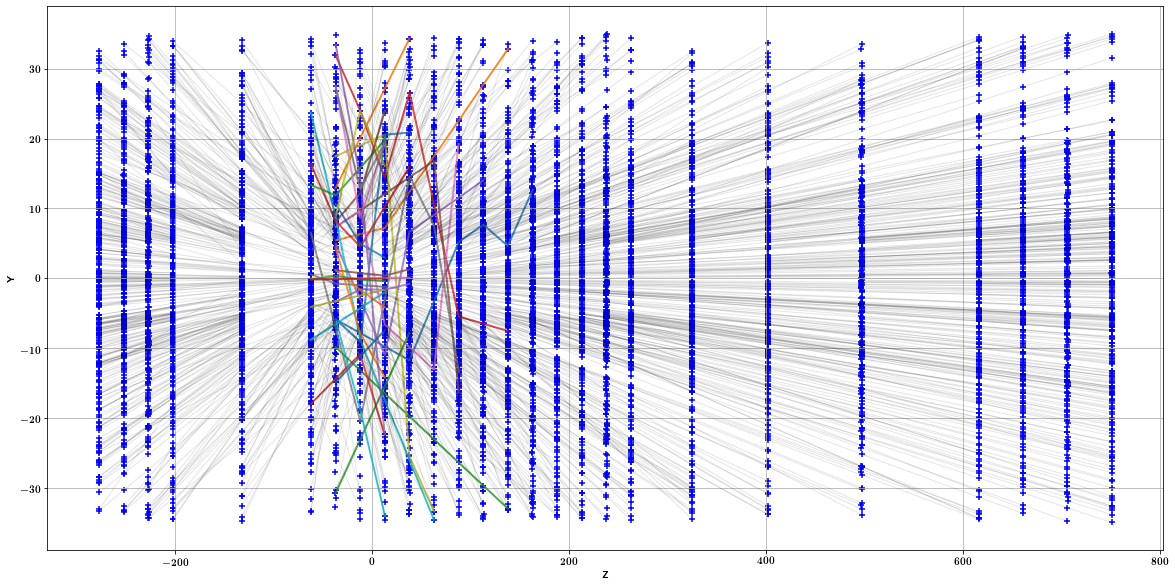

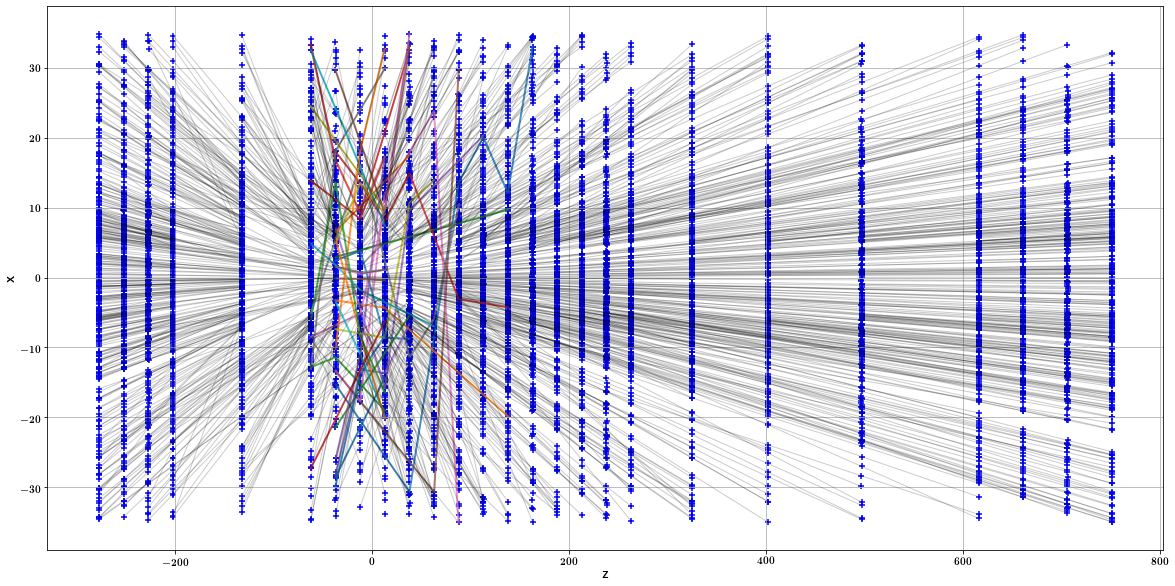

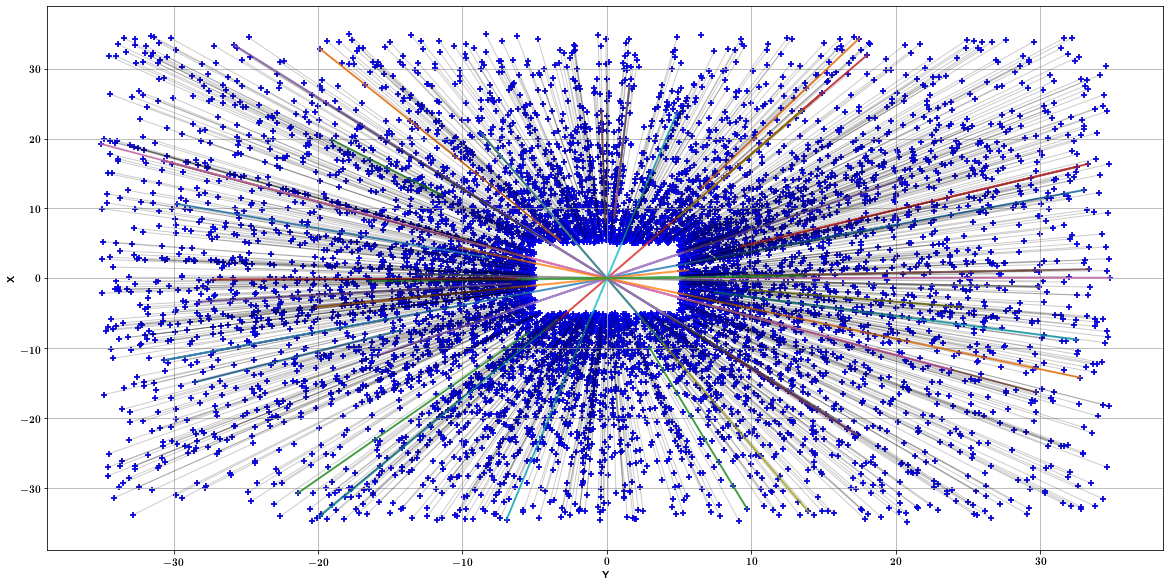

In [159]:
doing_plots(df, tracks) 